In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys, joblib, json, os

In [2]:
data = {}
for i in glob('*/A2_HWE-CZ/*results.json'):
    with open(i) as f:
       data[i.split('/')[0].replace('_',' ')]=json.load(f)

# with open('state_vector/IQP_Full-Pauli-CRX/IQP_Full-Pauli-CRX_results.json') as f:
#    data['state_vector']=json.load(f)

In [4]:
data_df = pd.DataFrame.from_dict(data).T.reset_index().melt(id_vars=['index'], value_vars=['R2_train','R2_test'])

In [5]:
# # Corrected code to avoid SettingWithCopyWarning
# data_df.loc[data_df['index'].isin(['without', 'state vector']), 'index'] = (
#     data_df.loc[data_df['index'].isin(['without', 'state vector']), 'index'].str.capitalize()
# )


In [6]:
data_df

,index,variable,value
0,TREX,R2_train,0.869106
1,TREX,R2_test,0.888065


In [7]:
data_df

,index,variable,value
0,TREX,R2_train,0.869106
1,TREX,R2_test,0.888065


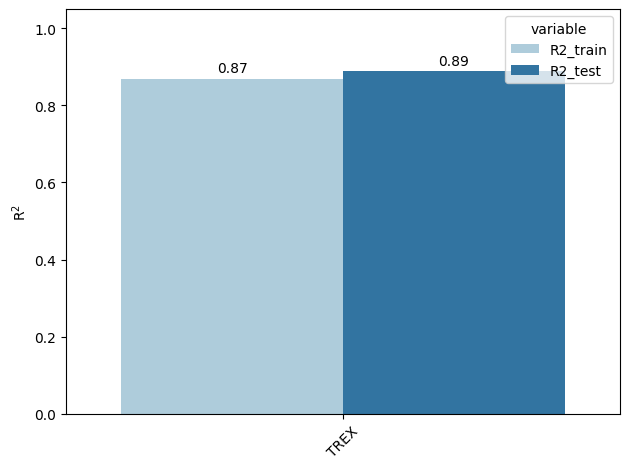

In [8]:
sns.barplot(data=data_df,x='index',y='value',hue='variable',palette=sns.color_palette('Paired',2))
plt.xticks(rotation=45)
plt.ylim(0,1.05)
# Add labels on top of the bars
ax = plt.gca()  # Get current axes
for bar in ax.patches:
    # Get the height of the bar
    height = bar.get_height()
    if height > 0:  # Only label non-zero bars
        # Add a text label just above the bar
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # x-coordinate
            height + 0.01,                     # y-coordinate slightly above the bar
            f'{height:.2f}',                   # Label text (formatted to 2 decimals)
            ha='center',                       # Center horizontally
            va='bottom',                       # Align bottom
            fontsize=10                        # Font size
        )
plt.ylabel('R$^{2}$')
plt.xlabel('')
plt.tight_layout()
plt.savefig(os.path.join(os.path.expanduser('~'), 'qregress/images/Function_Fitting/sine_error_mitigation.png'),dpi=300,bbox_inches='tight')
plt.show()